In [170]:
%matplotlib inline
#%matplotlib qt

In [192]:
import numpy as np
#data=np.loadtxt('rosenbrock_highorder/DACE/100_samplings/solution_v67/table_out.dat',skiprows=1,delimiter=',')
#data=np.loadtxt('rosenbrock_highorder/DACE/100_samplings/solution_v67/table_out.dat', \
#                skiprows=1,usecols = (0,2,3,4,5,6,7,8))

data=np.loadtxt('table_out_20_20.dat', \
                skiprows=1,usecols = (1,2,3,4))

In [193]:
import pandas as pd
#df = pd.DataFrame(data,columns=['id','x1','x2','x3','x4','x5','x6','qoi'])
df = pd.DataFrame(data,columns=['Height (DV1)','Diameter (DV2)','Total surface (QoI)','Volume (NL constraint)'])
#df = pd.DataFrame(data)
#df1 = df.drop('i', 1)
df1=df 
pdfile1=df
corr = pdfile1.corr()

In [199]:
#np.savetxt('np.csv', data, fmt='%.2f', delimiter=',', header="'DV1','DV2','DV3','DV4','DV5','DV6','QoI'")
#np.savetxt('np.csv', data, fmt='%.4f', delimiter=',', header="'Height','Diameter','Total surface (QoI)','Volume (NL constraint)'")

#data=np.loadtxt('table_out_20_20.dat', skiprows=1,usecols = (1,2,3))
#np.savetxt('np.csv', data, fmt='%.4f', delimiter='  ', header="'Height','Diameter','Total surface (QoI)'")

data=np.loadtxt('table_out_20_20.dat', skiprows=1,usecols = (1,2,4))
np.savetxt('np.csv', data, fmt='%.4f', delimiter='  ', header="'Height','Diameter','Volume (NL constraint)'")

In [174]:
pdfile1['Height (DV1)']= pdfile1['Height (DV1)']*100
pdfile1['Diameter (DV2)']= pdfile1['Diameter (DV2)']*100

pdfile1 = pdfile1[['Height (DV1)', 'Diameter (DV2)', 'Volume (NL constraint)', 'Total surface (QoI)']]
#tmp = pdfile1

In [175]:
pdfile1

,Height (DV1),Diameter (DV2),Volume (NL constraint),Total surface (QoI)
0,2.0,2.0,6.283185,18.849556
1,2.9,2.0,9.110619,24.504423
2,3.8,2.0,11.938052,30.159289
3,4.7,2.0,14.765485,35.814156
4,5.6,2.0,17.592919,41.469023
5,6.5,2.0,20.420352,47.123890
6,7.4,2.0,23.247786,52.778757
7,8.3,2.0,26.075219,58.433623
8,9.2,2.0,28.902652,64.088490
9,10.1,2.0,31.730086,69.743357


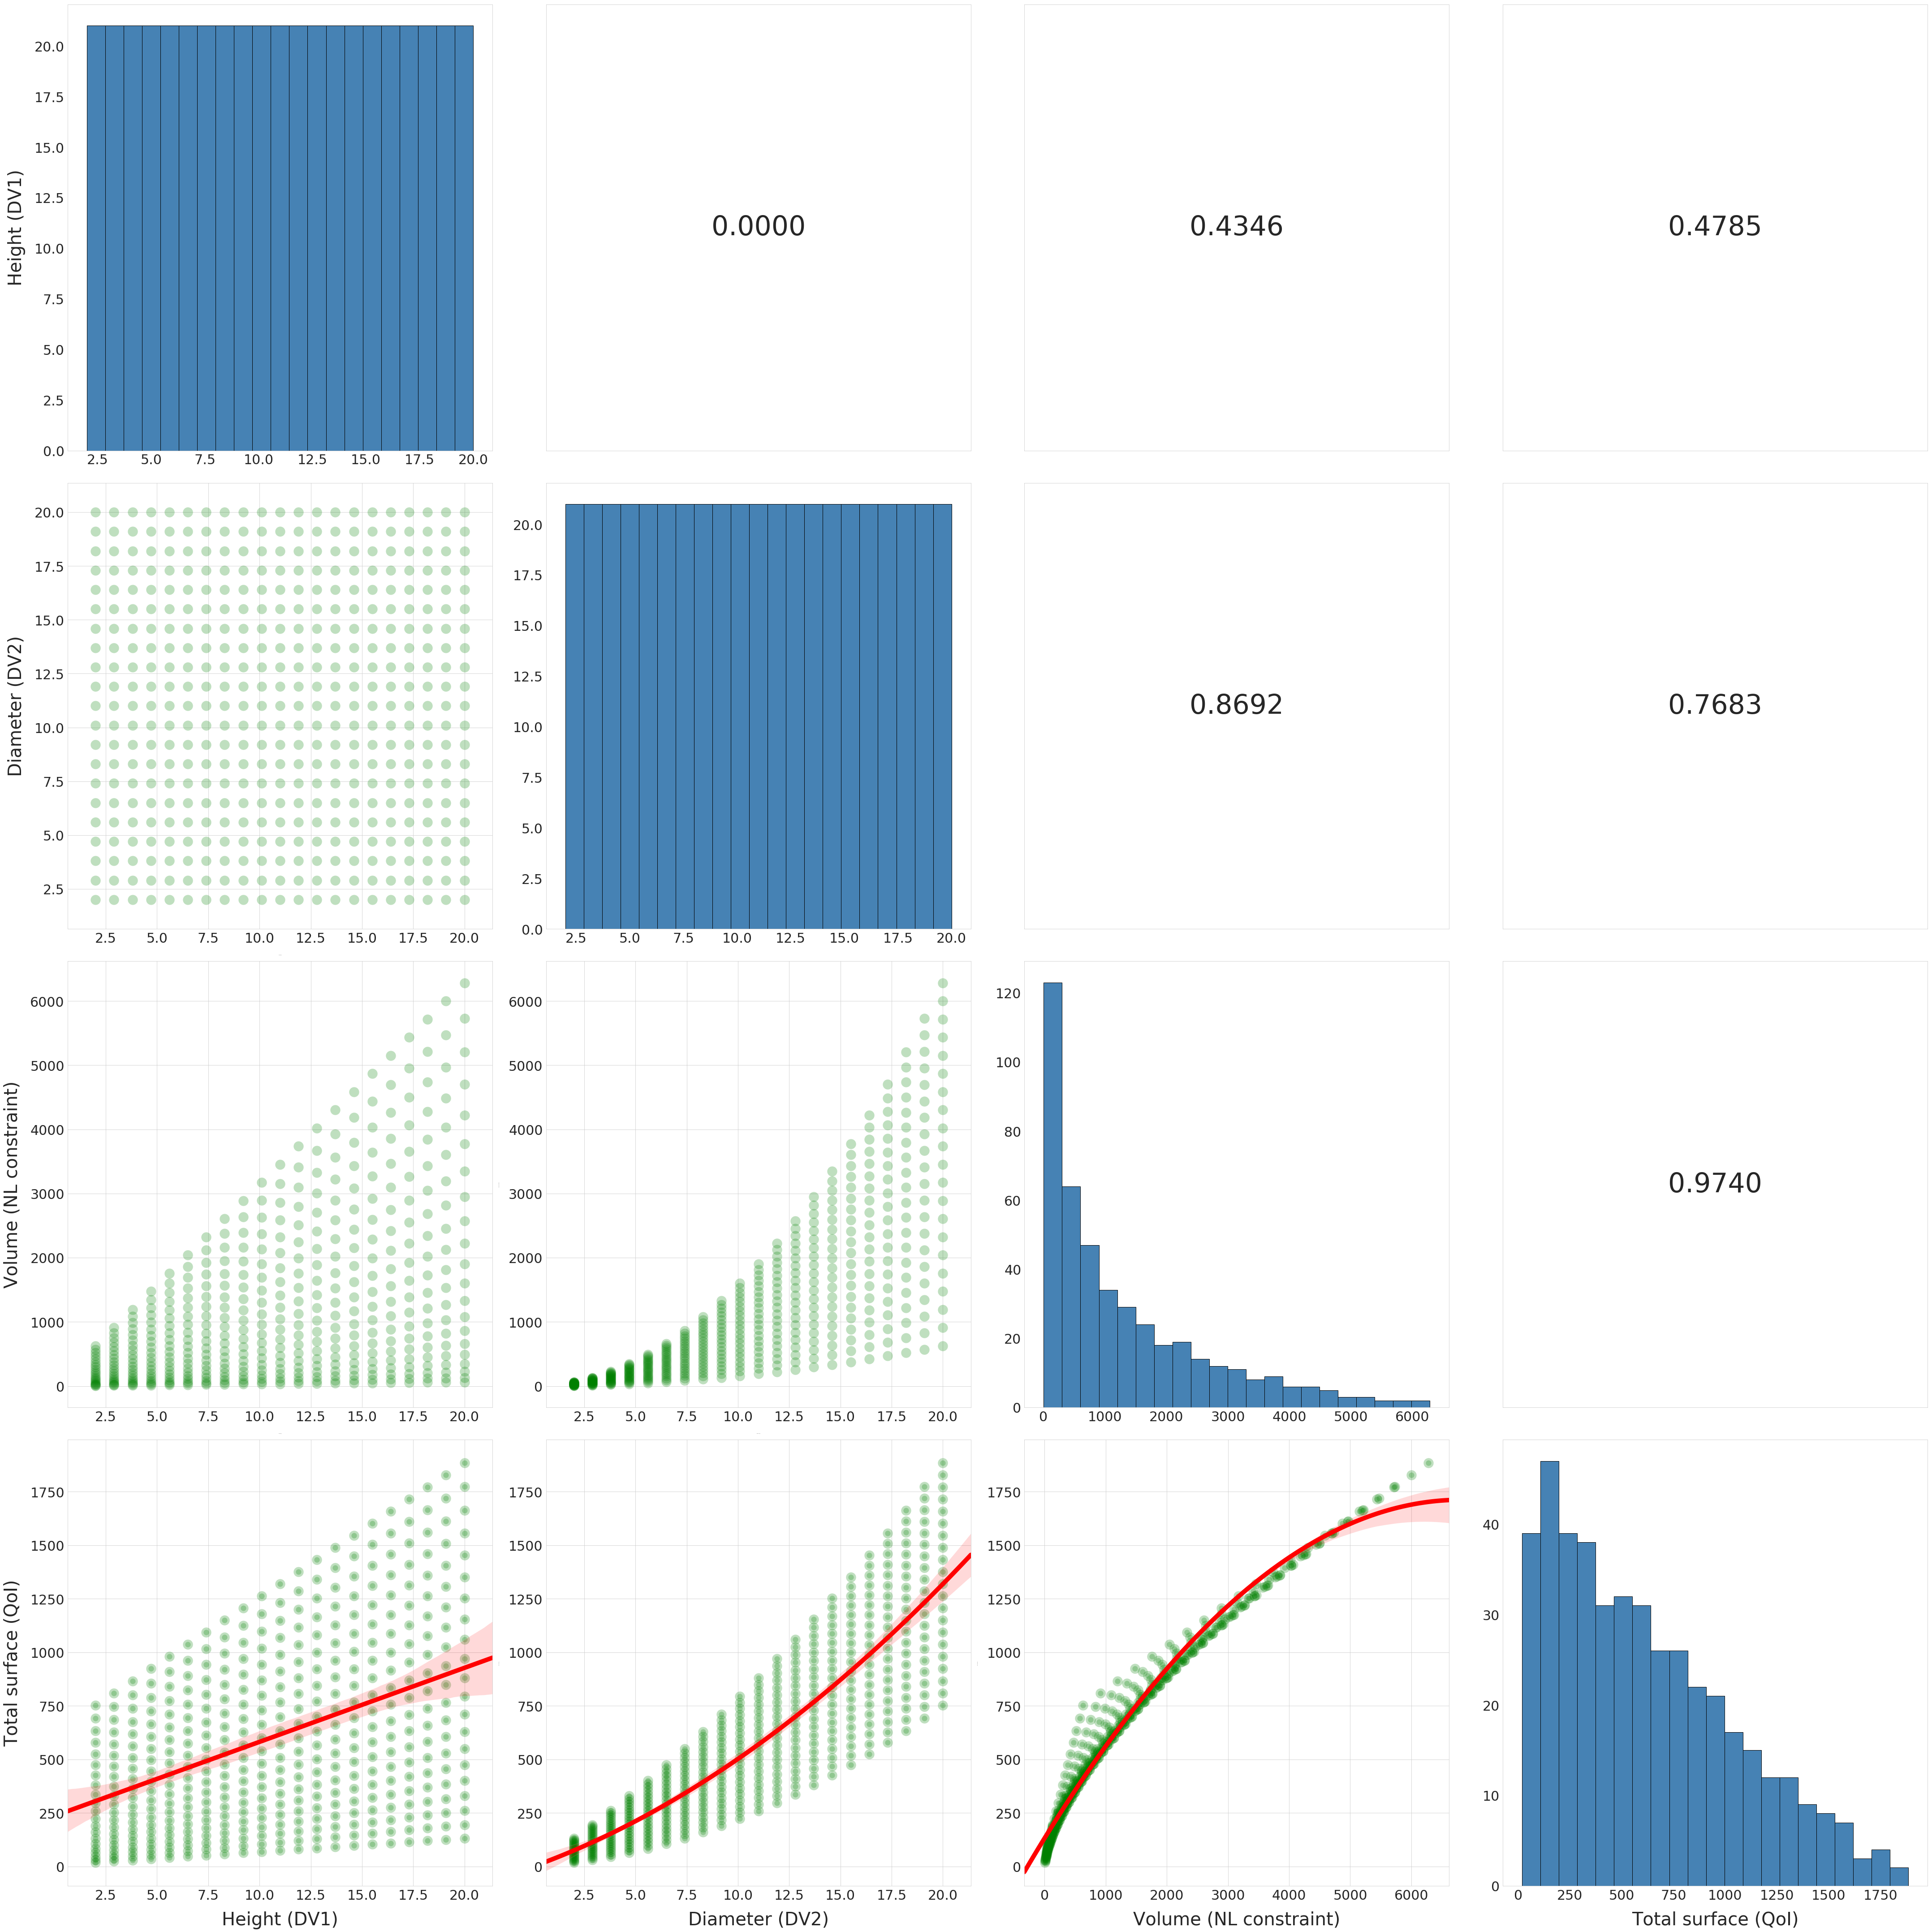

In [182]:
import matplotlib.pyplot as plt   
import seaborn as sns
import matplotlib.patches as patches

#sns.set_style("white")
sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("darkgrid")

#fig=plt.figure(figsize=(30, 30))
fig=plt.figure(figsize=(60, 60))


N = len(pdfile1.columns)

for i in range(N):
#for i in range(2,N):
#for i in range(12,N):
    for j in range(N): 
        ax = fig.add_subplot(N,N,i*N+j+1) 

        plt.xlabel('', fontsize=0)
        plt.ylabel('', fontsize=0)
  

        #SCATTER AND REGRESSION PLOTS
        if (i > j and i <= df.shape[1]-1): 
            #ax.scatter(pdfile1[pdfile1.columns[j]], pdfile1[pdfile1.columns[i]], s=10, 
            #           alpha=1.0/2.0, color='steelblue')#, edgecolor="black")
            
            dfactor=4
            
            xd=pdfile1[pdfile1.columns[j]].std()/dfactor
            yd=pdfile1[pdfile1.columns[i]].std()/dfactor

            xmin=pdfile1[pdfile1.columns[j]].min()-xd
            xmax=pdfile1[pdfile1.columns[j]].max()+xd
            ymin=pdfile1[pdfile1.columns[i]].min()-yd
            ymax=pdfile1[pdfile1.columns[i]].max()+yd
            
            plt.xlim([xmin, xmax])
            plt.ylim([ymin, ymax])

            #g = sns.regplot(pdfile1[pdfile1.columns[j]], pdfile1[pdfile1.columns[i]],
            #            order=2,color="green",
            #            scatter_kws={"s": 100,"alpha":0.25,"edgecolor":"black","linewidth":0},
            #            line_kws={"color": "red","linewidth":2})
            
            g = sns.regplot(pdfile1[pdfile1.columns[j]], pdfile1[pdfile1.columns[i]],
                        order=1,color="green",
                        scatter_kws={"s": 500,"alpha":0.25,"edgecolor":"black","linewidth":0},
                        line_kws={"color": "red","linewidth":2},
                        fit_reg=False)
                
            #ax.patch.set_facecolor('#F5F2EB')
            
            #NO AXIS NUMBERS OPTION1 - DO NOT RENDER OUTERMOST LABELS
            #ax.axes.get_xaxis().set_visible(False)
            #ax.axes.get_yaxis().set_visible(False)
            
            #NO AXIS NUMBERS OPTION2
            #ax.axes.get_xaxis().set_ticks([])
            #ax.axes.get_yaxis().set_ticks([])
            
            #ax.xaxis.label.set_size(40)
            ax.xaxis.set_tick_params(labelsize=30)
            ax.yaxis.set_tick_params(labelsize=30)
            #ax.grid(False)
            ax.xaxis.labelpad = 20 
            ax.yaxis.labelpad = 20 
            
            
            
        if (i > j and i == df.shape[1]-1): 
            #ax.scatter(pdfile1[pdfile1.columns[j]], pdfile1[pdfile1.columns[i]], s=10, 
            #           alpha=1.0/2.0, color='steelblue')#, edgecolor="black")
            
            dfactor=4
            
            xd=pdfile1[pdfile1.columns[j]].std()/dfactor
            yd=pdfile1[pdfile1.columns[i]].std()/dfactor

            xmin=pdfile1[pdfile1.columns[j]].min()-xd
            xmax=pdfile1[pdfile1.columns[j]].max()+xd
            ymin=pdfile1[pdfile1.columns[i]].min()-yd
            ymax=pdfile1[pdfile1.columns[i]].max()+yd
            #ymin=0
            #ymax=300
            
            plt.xlim([xmin, xmax])
            plt.ylim([ymin, ymax])

            #g = sns.regplot(pdfile1[pdfile1.columns[j]], pdfile1[pdfile1.columns[i]],
            #            order=2,color="green",
            #            scatter_kws={"s": 100,"alpha":0.25,"edgecolor":"black","linewidth":0},
            #            line_kws={"color": "red","linewidth":2})
            
            g = sns.regplot(pdfile1[pdfile1.columns[j]], pdfile1[pdfile1.columns[i]],
                        order=2,color="green",
                        scatter_kws={"s": 150,"alpha":0.25,"edgecolor":"black","linewidth":0},
                        line_kws={"color": "red","linewidth":10})
                
            #ax.patch.set_facecolor('#F5F2EB')
            
            #NO AXIS NUMBERS OPTION1 - DO NOT RENDER OUTERMOST LABELS
            #ax.axes.get_xaxis().set_visible(False)
            #ax.axes.get_yaxis().set_visible(False)
            
            #NO AXIS NUMBERS OPTION2
            #ax.axes.get_xaxis().set_ticks([])
            #ax.axes.get_yaxis().set_ticks([])
            
            #ax.xaxis.label.set_size(40)
            ax.xaxis.set_tick_params(labelsize=30)
            ax.yaxis.set_tick_params(labelsize=30)
            #ax.grid(False)
            ax.xaxis.labelpad = 20 
            ax.yaxis.labelpad = 20 
            
            
            
        #SCATTER AND REGRESSION PLOTS
#         if i > j: 
#             ax.scatter(pdfile1[pdfile1.columns[j]], pdfile1[pdfile1.columns[i]], s=100, 
#                        alpha=0.25, color='green', edgecolor="black",linewidth=0)
            
#             ax.patch.set_facecolor('#F5F2EB')
#             #ax.axes.get_xaxis().set_visible(False)
            
#             #NO AXIS NUMBERS OPTION2
#             ax.axes.get_xaxis().set_ticks([])
#             ax.axes.get_yaxis().set_ticks([])

           
            
            
        #EMPTY SQUARES OFF DIAGONAL OR SQUARES WITH CORRELATION TEXT
        if i < j: 

            #Hide frame
            #ax.axis('off')

            #Hide axes and ticks
            #ax.axes.get_xaxis().set_ticks([])
            #ax.axes.get_yaxis().set_ticks([])
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
        
            #ax.patch.set_facecolor('#F5F2EB')

            #Add text

            #ax.text(0.30,0.5,'%.4f' % corr.iloc[j,i], fontsize=40)
            ax.text(0.5, 0.5,
                    #"joel \n" '%.4f' % corr.iloc[j,i], fontsize=40,
                    '%.4f' % corr.iloc[j,i], size=60,
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ax.transAxes)

            #The use of transform=ax.transAxes throughout the code indicates
            #that the coordinates are given relative to the axes bounding box, with 0,0 
            #being the lower left of the axes and 1,1 the upper right.

            #ax.set_axis_bgcolor('blue')
            
            #ax.xaxis.label.set_size(40)
            ax.xaxis.set_tick_params(labelsize=30)
            ax.yaxis.set_tick_params(labelsize=30)
            #ax.grid(False)
            ax.xaxis.labelpad = 20 
            ax.yaxis.labelpad = 20         
            
            
            
        #LABEL OUTER MOST AXES 
        if j == 0: 
            ax.set_ylabel(pdfile1.columns[i],size='40')
        #if i == 0: 
        if i == N-1: 
            ax.set_xlabel(pdfile1.columns[j],size='40')
            
            
            
        #PLOT HISTOGRAMS 
        if i == j: 
            ax.hist(pdfile1[pdfile1.columns[i]], bins=21, 
                    #histtype='stepfilled',
                    color='steelblue',linewidth=1,edgecolor='black') 
            #ax.patch.set_facecolor('#F5F2EB')
            
            #NO AXIS NUMBERS OPTION1 - DO NOT RENDER OUTERMOST LABELS
            #ax.axes.get_xaxis().set_visible(False)
            #ax.axes.get_yaxis().set_visible(False) 
            
            #NO AXIS NUMBERS OPTION2
            #ax.axes.get_xaxis().set_ticks([])
            #ax.axes.get_yaxis().set_ticks([])
            
            #ax.xaxis.label.set_size(40)
            ax.xaxis.set_tick_params(labelsize=30)
            ax.yaxis.set_tick_params(labelsize=30)
            ax.grid(False)
            ax.xaxis.labelpad = 20 
            ax.yaxis.labelpad = 20 
    
    
    
        
        
#fig.subplots_adjust(hspace=0.2, wspace=0.2, left=0.08, bottom=0.08, top=0.9, right=0.9 )                
#fig.subplots_adjust(hspace=0.25, wspace=0.25) 
fig.subplots_adjust(hspace=1, wspace=1) 

#SET THE WHOLE FIGURE TO THE DESIRED BACKGROUND COLOR
#fig.patch.set_facecolor('#F5F2EB')

fig.tight_layout()

plt.show() 


#SAVE BACKGROUND COLOR IN OUTPUT FILE
#fig.savefig('f2.png', facecolor='#F5F2EB')  
#fig.savefig('f2.pdf', facecolor='#F5F2EB')  
#fig.savefig('f2.pdf') 


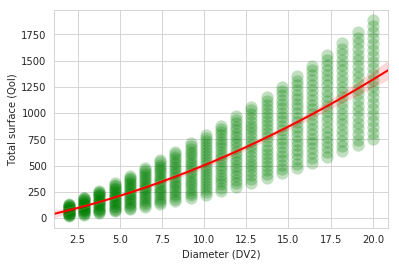

In [181]:
g = sns.regplot(pdfile1[pdfile1.columns[1]], pdfile1[pdfile1.columns[3]],
                        order=2,color="green",
                        scatter_kws={"s": 150,"alpha":0.25,"edgecolor":"black","linewidth":0},
                        line_kws={"color": "red","linewidth":2})

<Figure size 288x288 with 0 Axes>

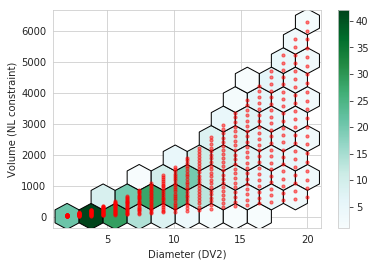

In [178]:
#To reset to matplotlib defaults
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

import matplotlib.pyplot as plt  

fig=plt.figure(figsize=(4,4))

#pdfile1.plot(kind='hexbin', x='x1', y='x2', gridsize=20,bins=10)

pdfile1.plot(kind='hexbin', x=pdfile1.columns[1], y=pdfile1.columns[2], 
             linewidths=1,edgecolors='black',gridsize=10,sharex=False,mincnt=1)

# pdfile1.plot(kind='hexbin', x=pdfile1.columns[1], y=pdfile1.columns[4], 
#              C=pdfile1.columns[6],reduce_C_function=np.min,gridsize=10,
#              linewidths=1,edgecolors='black',sharex=False,colormap='Blues',mincnt=0,
#              vmin=0, vmax=1000)

plt.scatter(pdfile1[pdfile1.columns[1]], pdfile1[pdfile1.columns[2]], 
             color='red',label='DATA1',s=10,marker='o',alpha=0.5)

In [179]:
#from pandas.plotting import parallel_coordinates
#parallel_coordinates(pdfile1,'QoI')

In [180]:
pdfile1.describe()

,Height (DV1),Diameter (DV2),Volume (NL constraint),Total surface (QoI)
count,441.00000,441.00000,441.000000,441.000000
mean,11.00000,11.00000,1301.954535,616.851718
std,5.45596,5.45596,1349.674232,433.824776
min,2.00000,2.00000,6.283185,18.849556
25%,6.50000,6.50000,254.298574,252.254182
50%,11.00000,11.00000,809.196513,535.845751
75%,15.50000,15.50000,1925.149129,902.846605
max,20.00000,20.00000,6283.185307,1884.955592
